# Book Recommendation System for online stores

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [63]:
ratings = pd.read_csv(r'/content/drive/MyDrive/Data Sets/BX-Book-Ratings.csv', delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1')
books = pd.read_csv(r'/content/drive/MyDrive/Data Sets/BX-Books.csv', delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1')
users = pd.read_csv(r'/content/drive/MyDrive/Data Sets/BX-Users.csv', delimiter=';', on_bad_lines='skip', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [65]:
#Printing columns and head part of books dataframe
print(books.columns)
books.head()

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Data Cleaning

### Books Data Preprocessing

In [66]:
#As we don't require the url columns in the books dataframe, we will drop those columns 
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [67]:
#Next we check for the null values in books dataframe

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [68]:
#Before droping lets check the rows which are null 

books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [69]:
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [70]:
#Dropping the Nan values as the percertage of null values is minimum

books.dropna(inplace=True)

In [71]:
#Checking the column year-of-publication 

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [72]:
#Checking the characters values in Year of publication

books[books['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [73]:
#Here the values are misplaced. We will try to fix this 

books.loc[209538 ,'Publisher'] = 'DK Publishing Inc'
books.loc[209538 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.loc[221678 ,'Publisher'] = 'DK Publishing Inc'
books.loc[221678 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'James Buckley'

books.loc[220731 ,'Publisher'] = 'Gallimard'
books.loc[220731 ,'Year-Of-Publication'] = 2003
books.loc[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.loc[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [74]:
#Then converting into int datatype

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')

In [75]:
#Checking the distribution of the data 

print(books['Year-Of-Publication'].sort_values().unique())

[   0 1376 1378 1806 1897 1900 1901 1902 1904 1906 1908 1909 1910 1911
 1914 1917 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2008 2010 2011 2012 2020 2021 2024 2026
 2030 2037 2038 2050]


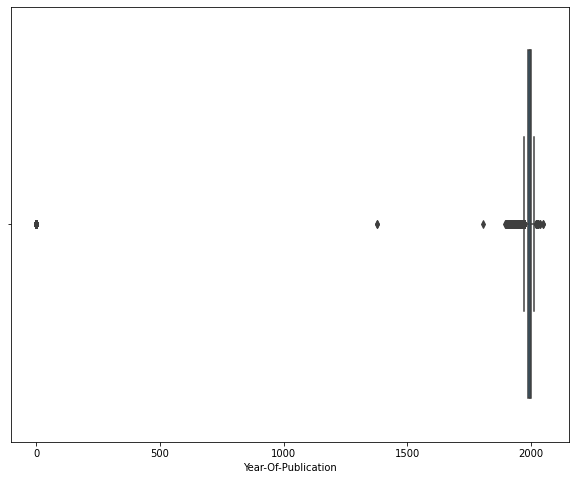

In [76]:
#Plotting boxplot 
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
import seaborn as sns
sns.boxplot(x = 'Year-Of-Publication', data=books)

In [77]:
#From the above we can see there are outliers, In this step we are replacing outliers with the mode values 

books.loc[((books['Year-Of-Publication'] < 1800) | (books['Year-Of-Publication'] > 2022)) , 'Year-Of-Publication'] = books['Year-Of-Publication'].mode()[0]

In [78]:
#Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [79]:
#Droping all the duplicates and resetting the index 

books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [80]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271044 entries, 0 to 271043
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271044 non-null  object
 1   Book-Title           271044 non-null  object
 2   Book-Author          271044 non-null  object
 3   Year-Of-Publication  271044 non-null  int64 
 4   Publisher            271044 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


### Ratings Pre-Processing

In [81]:
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [82]:
#Checking for null values 

ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [83]:
#Checking for the datatypes in Ratings 
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [84]:
#Checking for unique values in ratings 

ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [85]:
#Checking whether the user_id has any any negative ids or not 

print('Min:',ratings['User-ID'].min(),'  Max:', ratings['User-ID'].max())

Min: 2   Max: 278854


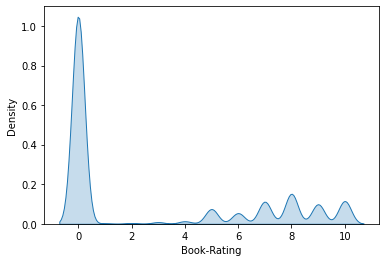

In [86]:
#Checking distribution of ratings using kde plot

sns.kdeplot(ratings['Book-Rating'], shade=True)

In [87]:
#Checking for any special characters and removing them 
import re
bookISBN = books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            ratings.loc[index , 'ISBN'] = f

In [88]:
#Uppercase all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [89]:
#Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [90]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Users Data Pre-processing

In [91]:
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [92]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


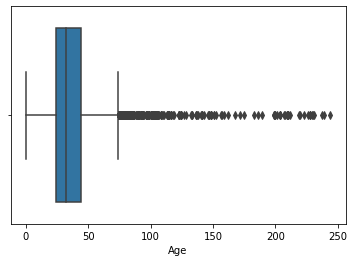

In [93]:
#Checking the unique values 
print(users['Age'].sort_values().unique())

sns.boxplot(users['Age'])

In [94]:
#Getting the mean value and imputing the null values and replacing the outliers with mean

median = users[(users['Age'] > 12 ) | users['Age'] < 70 ]['Age'].median()

#Replacing the outliers 
users.loc[((users['Age'] < 12 ) | (users['Age'] > 70)) , 'Age'] = median

In [95]:
#Imputing the null values
users['Age'].fillna(median, inplace=True)

In [96]:
#Making separate columns for location which includes city, state and country 

data = users.Location.str.split(', ')

In [97]:
import numpy as np
city = []
state = []
country = []
for i in range(len(data)):
  city.append(data[i][0])
  try:
    state.append(data[i][1])
  except:
    state.append(np.nan)
  try:
      country.append(data[i][2])
  except:
      country.append(np.nan)

In [98]:
users['city'] = city
users['state'] = state
users['country'] = country

In [99]:
users.isna().sum()

User-ID        0
Location       0
Age            0
city           0
state          1
country     4577
dtype: int64

In [100]:
print(len(users[users['city'] == 'n/a']) + len(users[users['city'] == ',']) + len(users[users['city'] == ' ']) + len(users[users['city'] == '']) + len(users[users['city'].isnull()]))
print(len(users[users['state'] == 'n/a']) + len(users[users['state'] == ',']) + len(users[users['state'] == ' ']) + len(users[users['state'] == '']) + len(users[users['state'].isnull()]))
len(users[users['country'] == 'n/a']) + len(users[users['country'] == ',']) + len(users[users['country'] == ' ']) + len(users[users['country'] == '']) + len(users[users['country'].isnull()])

561
16044


4666

In [101]:
users.fillna('others',inplace=True)

In [102]:
users.loc[((users['city'] == 'n/a') | (users['city'] == ',') | (users['city'] == ' ') | (users['city'] == '')), 'city'] = 'Others'
users.loc[((users['state'] == 'n/a') | (users['state'] == ',') | (users['state'] == ' ') | (users['state'] == '')), 'state'] = 'Others'
users.loc[((users['country'] == 'n/a') | (users['country'] == ',') | (users['country'] == ' ') | (users['country'] == '')), 'country'] = 'Others'

In [103]:
reg = "[^A-Za-z ]" 

'''for i,val in enumerate(users['country']):
  z = re.search(reg,val)
  if z:
    users.loc[i,'country'] = re.sub(r"[^a-zA-Z ]","",val)'''

'''for i,val in enumerate(users['state']):
  z = re.search(reg,val)
  if z:
    users.loc[i,'state'] = re.sub(r"[^a-zA-Z ]","",val)

for i,val in enumerate(users['city']):
  z = re.search(reg,val)
  if z:
    users.loc[i,'city'] = re.sub(r"[^a-zA-Z ]","",val)'''

'for i,val in enumerate(users[\'state\']):\n  z = re.search(reg,val)\n  if z:\n    users.loc[i,\'state\'] = re.sub(r"[^a-zA-Z ]","",val)\n\nfor i,val in enumerate(users[\'city\']):\n  z = re.search(reg,val)\n  if z:\n    users.loc[i,\'city\'] = re.sub(r"[^a-zA-Z ]","",val)'

In [104]:
#Dropping the location column 
users.drop('Location', axis=1, inplace=True)
users.head()

,User-ID,Age,city,state,country
0,1,32.0,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,32.0,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,32.0,farnborough,hants,united kingdom


### Merge DataFrames


In [105]:
books_ratings_merge = pd.merge(books,ratings,on='ISBN',how='inner')
merged_data = pd.merge(books_ratings_merge,users,on='User-ID',how='inner')

In [106]:
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32.0,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32.0,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32.0,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32.0,timmins,ontario,canada


In [107]:
merged_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
Age                    0
city                   0
state                  0
country                0
dtype: int64

In [108]:
books1 = merged_data[merged_data['Book-Rating']!=0].reset_index(drop=True)
books1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32.0,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,32.0,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,32.0,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,32.0,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,32.0,timmins,ontario,canada


In [109]:
books2 = merged_data[merged_data['Book-Rating']==0].reset_index(drop=True)
books2.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18.0,stockton,california,usa
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32.0,timmins,ontario,canada
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32.0,timmins,ontario,canada
3,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32.0,timmins,ontario,canada
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,32.0,timmins,ontario,canada


# Data VisualIzation



##### Distribution of published books in each year 


Text(0, 0.5, 'Number of books published')

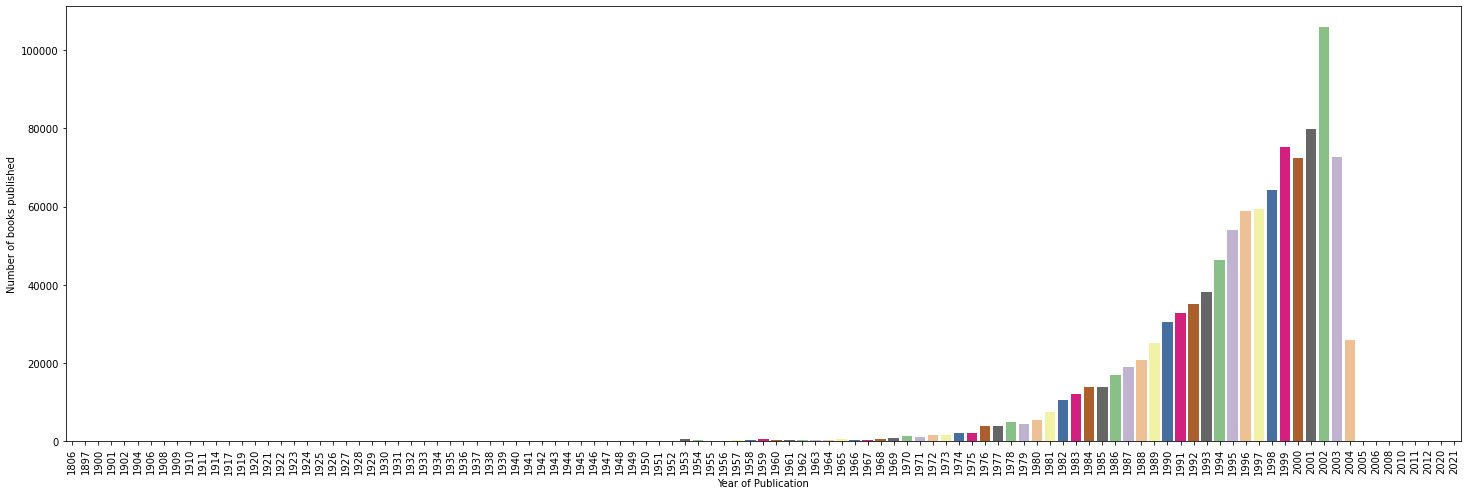

In [110]:
plt.figure(figsize=(25,8))
sns.countplot(x = 'Year-Of-Publication', data=merged_data, palette = 'Accent')
plt.xticks(rotation = 90)
plt.xlabel('Year of Publication')
plt.ylabel('Number of books published')


##### Top 15 Authors 

Text(0, 0.5, 'Number of books ratings')

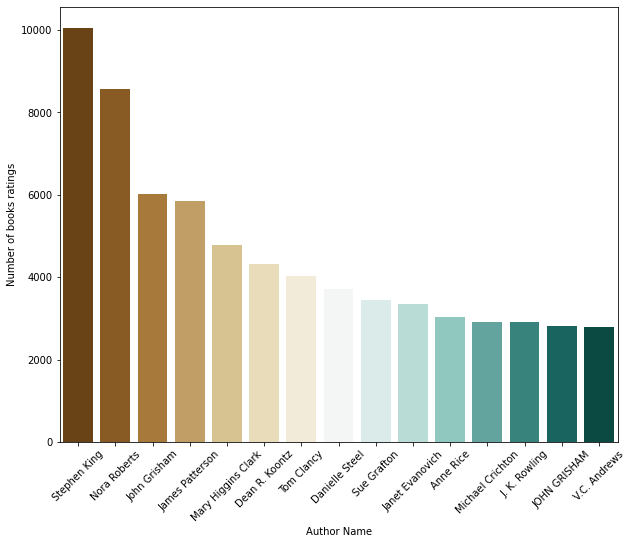

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(x=merged_data['Book-Author'], order = merged_data['Book-Author'].value_counts().index[0:15], palette='BrBG')
plt.xticks(rotation=45)
plt.xlabel('Author Name')
plt.ylabel('Number of books ratings')

##### Top 15 Publishers

Text(0, 0.5, 'Number of books published')

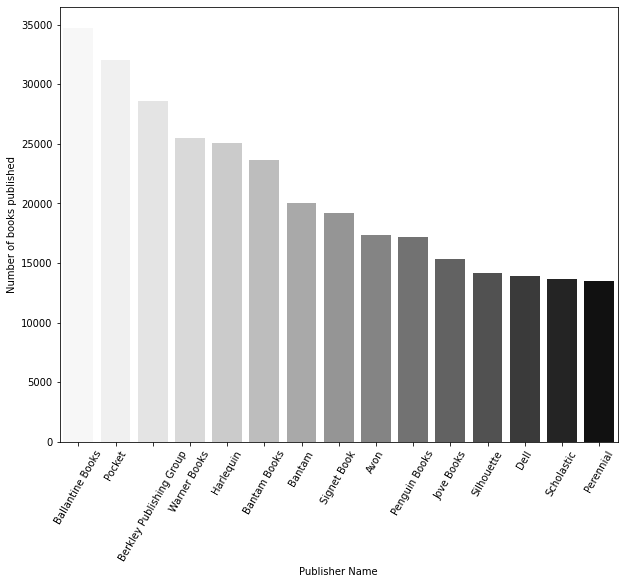

In [112]:
plt.figure(figsize=(10,8))
sns.countplot(x=merged_data['Publisher'], order = merged_data['Publisher'].value_counts().index[0:15], palette='Greys')
plt.xticks(rotation=60)
plt.xlabel('Publisher Name')
plt.ylabel('Number of books published')

##### Distribution of Book Ratings 

Text(0, 0.5, 'Number of ratings')

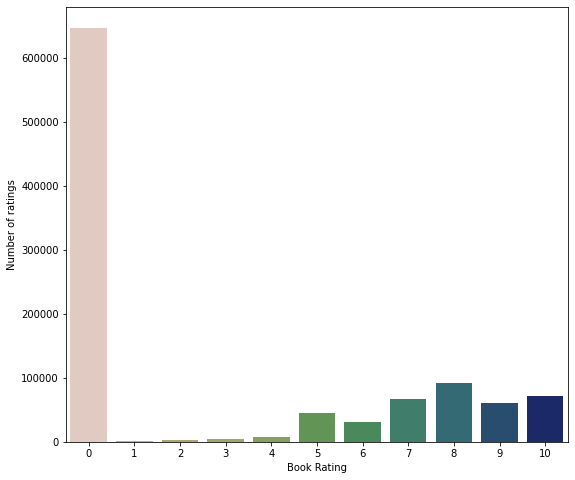

In [113]:
plt.figure(figsize=(9,8))
sns.countplot(x = 'Book-Rating', data=merged_data, palette='gist_earth_r')
plt.xlabel('Book Rating')
plt.ylabel('Number of ratings')

##### Distribution of Age

Text(0, 0.5, 'Number of People')

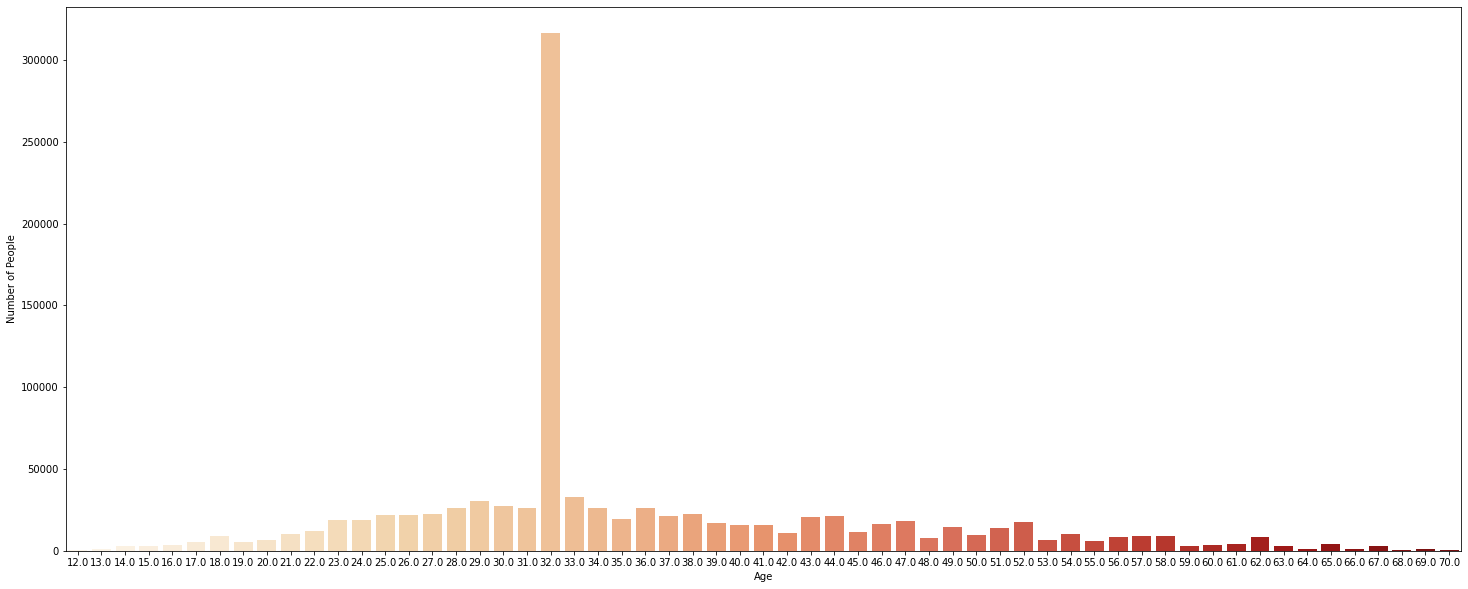

In [114]:
plt.figure(figsize=(25,10))
sns.countplot(data = merged_data, x = 'Age', palette='OrRd')
plt.xlabel('Age')
plt.ylabel('Number of People')

##### Number of books from each country

In [115]:
temp_country = merged_data['country'].value_counts().reset_index()

plt.figure(figsize=(8,8))
px.pie(values = temp_country['country'][0:5], names=temp_country['index'][0:5], title='Numbers of books from each country')

<Figure size 576x576 with 0 Axes>

##### Top 50 number of readers from each city

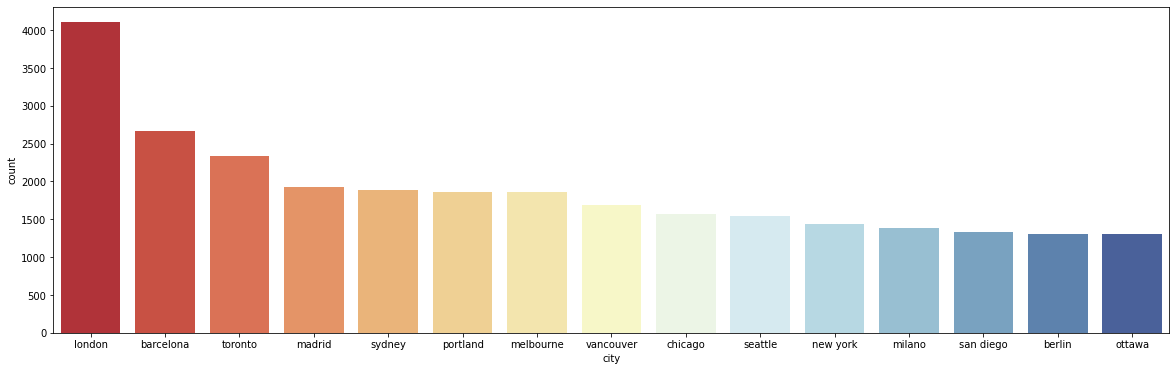

In [116]:
plt.figure(figsize=(20,6))
sns.countplot(x="city", data=users,order=users['city'].value_counts().index[0:15],palette='RdYlBu')

##### Top 50 number of readers from each state

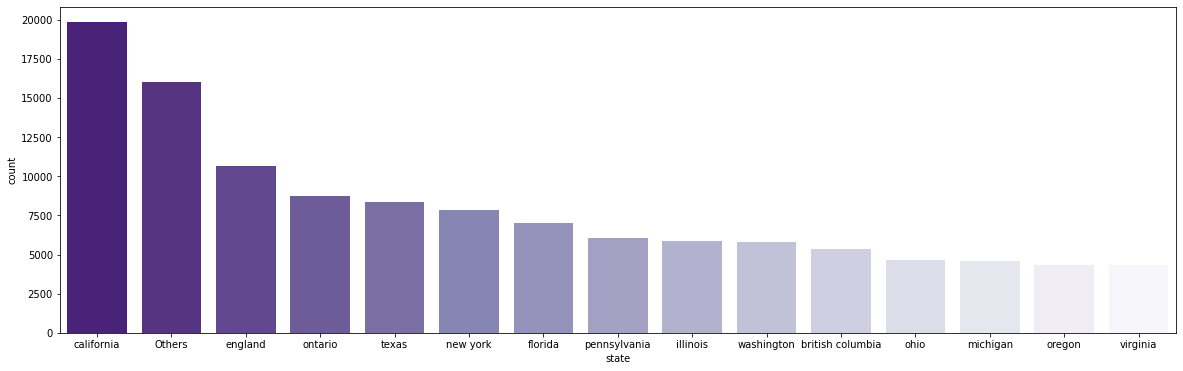

In [117]:
plt.figure(figsize=(20,6))
sns.countplot(x="state", data=users,order=users['state'].value_counts().index[0:15], palette='Purples_r')